# 5.3 回归与分类初步

前面我们已经看到过不少例子，实际问题调用算法，总是需要先将“数据”转化为向量。分类问题从算法的角度来看，主要着眼点在于如何将已经完成**向量化**的"数据点"（一般是高维的）进行归类操作。如前一节所讲的聚类方法其实是一些很有效的分类算法。

## 一、最小二乘拟合与线性回归

### 最小二乘拟合

多项式拟合：找出一组多项式系数$a_i(i=0,1,\ldots,n)$，使得多项式
       $$ Q_n(x) = a_0x^n + a_1x^{n-1} + \cdots + a_{n-1}x + a_n $$
能够较好地拟合原始数据（注意与插值法的区别）

**例1**：在$[-1,1]$上比较不同次数多项式拟合Runge函数。

In [2]:
x = -1 + 2*(0:10)/10;
y = 1./(1 + 25*x.*x);
xx = -1:0.01:1;
yy = 1./(1 + 25*xx.*xx);

In [3]:
p3 = polyfit(x, y, 3); y3 = polyval(p3, xx);
p5 = polyfit(x, y, 5); y5 = polyval(p5, xx);
p8 = polyfit(x, y, 8); y8 = polyval(p8, xx);
p10= polyfit(x, y,10); y10= polyval(p10,xx);

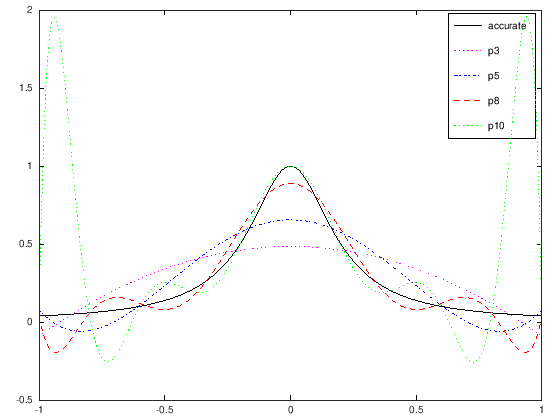

In [5]:
plot(xx,yy,'k-',xx,y3,'m:',xx,y5,'b-.',xx,y8,'r--',xx,y10,'g:');
legend('accurate','p3','p5','p8','p10');
print -dpng polyfitdiff.png   %% save the figure in a .png file

**注**：最小二乘拟合的数值实现，可以用正规矩阵方法(在科学计算或数值分析中应已详细介绍过)、QR分解法(用Householder变换和Givens变换可以节省计算量)等类型丰富的技巧，本课程中我们不予详细展开，有兴趣的读者可以参考更多数值分析的教材。

**例2**：数据拟合：非线性模型。

某人内喝下2瓶啤酒后，每隔一定时间(h)测得血液酒精含量(mg/100ml)如下

\begin{array}{|c|c|c|c|c|c|c|}
\hline
时间 & 0.25 & 0.5 & 0.75 & 1  & 1.5 & 2  \\ \hline
{酒精} & 30   & 68  & 75   & 82 & 82  & 77 \\ \hline\hline
时间 & 2.5  & 3   & 3.5  & 4  & 4.5 & 5  \\ \hline
{酒精} & 68   & 68  & 58   & 51 & 50  & 41 \\ \hline\hline
时间 & 6    &  7  &  8   & 9  & 10  & 11 \\ \hline
{酒精} & 38   & 35  & 28   & 25 & 18  & 15 \\ \hline\hline
时间 & 12   & 13  & 14   & 15 & 16  &    \\ \hline
{酒精} & 12   & 10  & 7    &  7 &  4  &    \\ \hline
\end{array}

试用如下函数拟合得到$a,b,c$：
$$\psi(t) = at^be^{ct}$$

**解**: 录入数据

In [8]:
t = [0.25 0.5 0.75 1 1.5 2 2.5 3 3.5 4 4.5 5 6 7 8 9 10 11 12 13 14 15 16];
h = [30 68 75 82 82 77 68 68 58 51 50 41 38 35 28 25 18 15 12 10 7 7 4];

对拟合函数做对数变换
$$\ln \psi(t) = \ln a + b \ln t + c t $$

In [10]:
h1 = log(h);
f = inline('x(1) + x(2).*log(t) + x(3).*t','x','t');  % 定义拟合模型

调用线性拟合方法计算参数$\ln a, b$ 和 $c$.

In [1]:
pkg load optim

In [13]:
[x,r] = lsqcurvefit(f, [1,0.5,-0.5], t, h1);

拟合结果可视化：

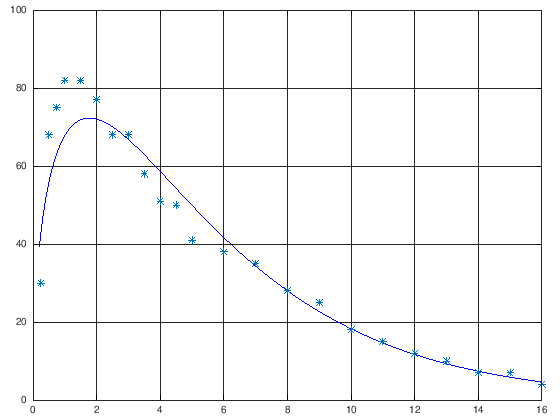

In [16]:
tt = 0.2:0.1:16; hh = feval(f, x, tt);
plot(tt, exp(hh), 'b-',t, h, '*'); grid on; axis([0 16 0 100]);

### 线性回归（模型）

回归（Regession）模型
 - 应用广泛，如：预测房价、销售额、气温等输出值为连续值的问题
 
回归模型输出的是连续值
 - 多元线性回归：
     $$ y = {\bf \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_m} + \varepsilon $$

回归的概念： ![regress](figs/regressionconcept.png)

然而拟合只需给出“拟合曲线”：  ![fit](figs/regression-linear.png)

#### Octave 线性回归分析

In [2]:
pkg load statistics

In [5]:
regress

error: Invalid call to regress.  Correct usage is:

 -- Function File: [B, BINT, R, RINT, STATS] = regress (Y, X, [ALPHA])

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


  - $x,y$~分别表示自变量和因变量，每列表示一个向量
  - $\alpha$~表示显著性水平
  - $b, bint$~是回归系数的估计值和置信区间
  - $r, rint$~是残量的估计值和置信区间
  - $stats$~含四个统计量，用于判断回归模型是否可信，依次为: 
         - 决定系数$R^2$ (刻画自变量引起的因变量变化程度)
         - F值
         - F分布大于F值的概率$p$,\alert{当$p<\alpha$时回归模型有效}
         - 剩余方差$s^2$

**例3**: carsmallm是一个关于小型汽车的重量(Weight)、功率（Horsepower）与油耗(MPG)之间的统计数据。请给出三者之间的关系

In [9]:
load carsmallm; %% this dataset is borrow from matlab, by executing load carsmall, and then save carsmallm. please make sure that you can find carsmallm.dat in the current folder
x1 = Weight;  x2 = Horsepower;  y = MPG;   %% check out these data

In [ ]:
x = [ones(size(x1)) x1 x2 x1.*x2];   % 猜测  y 与  x1 和 x2 是何种函数关系（即Model，拟合模型）

In [10]:
[b, bint, r, rint, stats] = regress(y, x);   % 执行回归

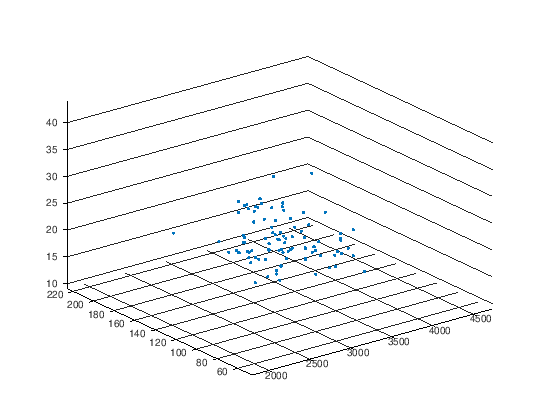

In [13]:
scatter3(x1,x2,y,'filled'); axis tight  % plot the original data

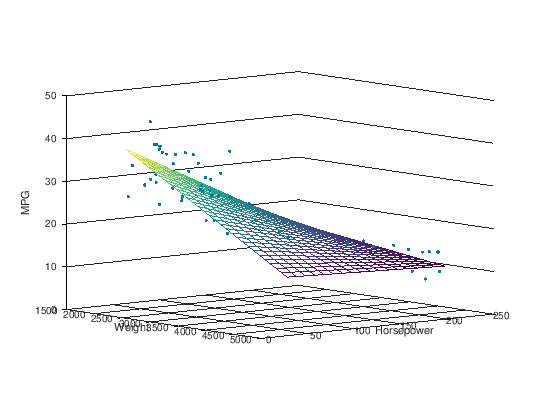

In [14]:
[xx,yy] = meshgrid(min(x1):100:max(x1), min(x2):10:max(x2));
zz = b(1) + b(2)*xx + b(3)*yy + b(4)*xx.*yy;
mesh(xx,yy,zz);  view(50,10);   % plot the regression data
xlabel('Weight'); ylabel('Horsepower'); zlabel('MPG'); 
hold on; scatter3(x1,x2,y,'filled'); hold off; 

In [15]:
figure; rcoplot(r, rint); % plot the residual, not implemented in Octave, a sample from matlab see blow

Forge but has not yet been implemented.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'rcoplot' undefined near line 1 column 9


Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



![rcplot](figs/rcplotexe3.png)

**练习1**: 试着去掉“异常数据”后再实施回归，以减少Residuals。给出你的分析结果。

**练习2**：有一些列关于血压与年龄、体重指数、吸烟习惯的关系的调查数据，如下表所示

\begin{array}{c|c|c|c|c|c|c|c|c|c|c|c|c|c}
血压 & 年龄 & 体重 & 吸烟 & & 血压 & 年龄 & 体重 & 吸烟 & &  血压 & 年龄 & 体重 & 吸烟 \\ \hline
144 & 39 & 24.2 & 0 & &  162 & 64 & 28.0 & 1 & &  136 & 36 & 25.0 & 0 \\ 
215 & 47 & 31.1 & 1 & &  150 & 56 & 25.8 & 0 & &  142 & 50 & 26.2 & 1 \\ 
138 & 45 & 22.6 & 0 & &  140 & 59 & 27.3 & 0 & &  120 & 39 & 23.5 & 0 \\ 
145 & 47 & 24.0 & 1 & &  110 & 34 & 20.1 & 0 & &  120 & 21 & 20.3 & 0 \\
162 & 65 & 25.9 & 1 & &  128 & 42 & 21.7 & 0 & &  160 & 44 & 27.1 & 1 \\
142 & 46 & 25.1 & 0 & &  130 & 48 & 22.2 & 1 & &  158 & 53 & 28.6 & 1 \\
170 & 67 & 29.5 & 1 & &  135 & 45 & 27.4 & 0 & &  144 & 63 & 28.3 & 0 \\
124 & 42 & 19.7 & 0 & &  114 & 18 & 18.8 & 0 & &  130 & 29 & 22.0 & 1 \\
158 & 67 & 27.2 & 1 & &  116 & 20 & 22.6 & 0 & &  125 & 25 & 25.3 & 0 \\
154 & 56 & 19.3 & 0 & &  124 & 19 & 21.5 & 0 & &  175 & 69 & 27.4 & 1 \\
\end{array}

试建立血压与其他各因素之间的模型，并做回归分析。分情形
 - 只考虑年龄因素
 - 考虑年龄、体重、吸烟等三个因素
 
并根据得到的结果评价数据并改进模型。

#### Octave 非线性回归分析

 - 回归模型

$$ y = f(\mathbf{x},\beta),\quad \mathbf{x} = (x_1,x_2,\ldots,x_m), \beta = (\beta_1,\beta_2,\ldots,\beta_m) $$

 - Octave函数

In [17]:
nlinfit

error: Invalid call to nlinfit.  Correct usage is:

 -- Function File: nlinfit (X, Y, MODELFUN, BETA0)
 -- Function File: nlinfit (X, Y, MODELFUN, BETA0, OPTIONS)
 -- Function File: nlinfit (..., NAME, VALUE)
 -- Function File: [BETA, R, J, COVB, MSE] = nlinfit (...)

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


其中，
  - $X,Y$含义同线性回归函数
  - 'MODELFUN'是模型的函数（以M-函数形式给出）
  - BETA、BETA0分别是回归系数的返回值和初始值
  - $R$是残差
  - $J$是用于估计预测误差的Jacobi矩阵

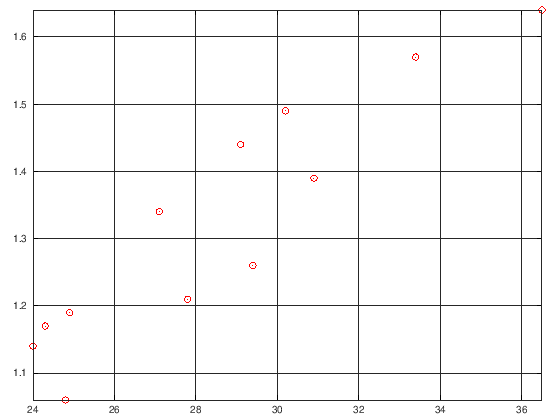

In [41]:
x = [27.1 30.2 24.0 33.4 24.9 24.3 30.9 27.8 29.4 24.8 36.5 29.1]';
y = [1.34 1.49 1.14 1.57 1.19 1.17 1.39 1.21 1.26 1.06 1.64 1.44]';
plot(x,y,'ro'); grid on; axis tight;

In [37]:
function y = myfun(b,x)
y = b(1)*x./(b(2) + x);   % change to other funciton
end

In [38]:
b0 = [143, 0.03]; 
[b,R,J] = nlinfit(x,y,'myfun',b0);

error: f(0.03,_): subscripts must be either integers 1 to (2^31)-1 or logicals
error: called from
    __nonlin_residmin__ at line 585 column 9
    nonlin_curvefit at line 83 column 18
    nlinfit at line 169 column 18


In [ ]:
可用于分析输出结果的辅助函数:

In [40]:
nlparci    %  bi = nlparci(b,R,J)

Forge but has not yet been implemented.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'nlparci' undefined near line 1 column 1


尽管目前它们在Octave中尚未实现，但是在matlab中调用的格式是一致的，我们给出分析的实例及其结果。

In [19]:
nlintool    % nlintool(x,y,'myfun', b);

Forge but has not yet been implemented.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'nlintool' undefined near line 1 column 1


![nlintool](figs/nlintool.png)

## 二、支持向量机

在机器学习领域中，支持向量机(Support Vector Machine, SVM) 根据其统计学习理论方面的数学基础，提供了一类有效的分类方法，线性分类和非线性分类都支持。SVM已经被广泛地应用于（有监督）分类问题、回归分析以及特征降维中。 这里我们以点集的分类问题为例：
![classify](figs/classifyproblem.jpg)

在超平面$w\cdot x + b = 0$上方的我们定义为$y=1$,在超平面$w\cdot x + b = 0$下方的我们定义为$y=−1$。可以看出满足这个条件的超平面并不止一个!

**问**:哪个超平面用于分类（泛化能力）是最好的呢？

**方案１**：最小二乘法（即感知机模型）：
$$ \min_{w,b} \sum_{x_i \in M} \frac{-y^{i}\big( w \cdot x^i + b \big)}{\|w\|_2}:= \min_{w,b,\|w\|_2=1} \sum_{x_i \in M} -y^{i}\big( w \cdot x^i + b \big). $$

观察：
 - 可以找到多个可以分类的超平面将数据分开，并且优化时希望所有的点都被准确分类
 - 实际上,离超平面很远的点已经被正确分类，它们对超平面的位置没有影响！
 - 那些离超平面很近的点很容易被误分类!　

**方案2**: 最小距离最大化（SVM的几何意义）：即将散点到超平面的间隔
    $$\gamma　=　\min_{x^i\in M} \frac{|y^i(w\cdot x^i + b)|}{\| w \|_2}$$
 最大化！即支持向量机,几何关系如下图所示：
![svm](figs/svm-geometry.jpg)

利用最优化（凸优化）理论中的**ＫＫＴ条件**（利用**Ｌａｇｒａｎｇｅ对偶**以及极值的**一阶必要条件**），最后可以推出最优解(中间过程请参考凸优化或机器学习相关理论材料，此外，在吴恩达机器学习课程中的解释，则是从逻辑回归衍生的角度来谈的)。几何间隔最大的分离超平面是唯一的：
$$ w = \sum_{i=1}^{m} \alpha_i^* y_i x_i $$
这里，$\alpha_i^*$ 为**对偶问题**的最优解。最后，通过求解
$$ y_s(w \cdot x_s + b) = 1 $$
得到$b$的最优值，这里 $x_s$是**支持向量**,如上图中的红色点。

此外，SVM还包括核技巧，这使它成为实质上的非线性分类器。SVM的的学习策略就是间隔最大化，可形式化为一个求解凸二次规划的问题，也等价于正则化的合页损失函数的最小化问题。SVM的的学习算法就是求解凸二次规划的最优化算法。

### SVM的程序实现：LIBSVM - 编译安装！

LIBSVM是一个由台湾大学林智仁(Lin Chih-Jen)教授等开发的SVM模式识别与回归的软件包（https://www.csie.ntu.edu.tw/~cjlin/libsvm/ ），使用简单，功能强大。matlab也自带了svm实现函数，但自带的svm实现函数仅支持分类问题，不支持回归问题；而libsvm不仅支持分类问题，亦支持回归问题，参数可调节，功能更强大。源码的下载：https://github.com/cjlin1/libsvm

这里svmtrain事实上是由libsvm实现的核心算法，同时libsvm提供了matlab,python, R,...等语言的接口。octave经过接口适当的修正和调试也可以享用matlab实现的接口。 为简便起见，我们假设用户已经安装了libsvm的matlab接口，更详细的安装方式，请参阅libsvm的安装方法。
 - Windows + matlab： https://blog.csdn.net/qq_31781741/article/details/82666861
 - Linux  +  matlab： https://blog.csdn.net/johnnyconstantine/article/details/45936933

两个步骤：训练建模——>模型预测

分类  model = svmtrain(trainlabel, traindata, ‘-s 0 -t 2 -c 1.2 -g 2.8’);

回归  model = svmtrain(trainlabel, traindata, ‘-s 3 -t 2 -c 2.2 -g 2.8 -p 0.01’);

参数说明：

-s svm类型：SVM设置类型(默认0)
　　0 – C-SVC
　　1 --v-SVC
　　2 – 一类SVM
　　3 – e -SVR
　　4 – v-SVR

-t 核函数类型：核函数设置类型(默认2)
　　0 – 线性：u’v
　　1 – 多项式：(ru’v + coef0)^degree
　　2 – RBF函数：exp(-r|u-v|^2)
　　3 –sigmoid：tanh(ru’v + coef0)

-g r(gama)：核函数中的gamma函数设置(针对多项式/rbf/sigmoid核函数)

-c cost：设置C-SVC，e -SVR和v-SVR的参数(损失函数)(默认1)，惩罚系数

-n nu：设置v-SVC，一类SVM和v- SVR的参数(默认0.5)

-p p：设置e -SVR 中损失函数p的值(默认0.1)

-d degree：核函数中的degree设置(针对多项式核函数)(默认3)

-wi weight：设置第几类的参数C为weight*C(C-SVC中的C)(默认1)

-v n: n-fold交互检验模式，n为fold的个数，必须大于等于2

### 案例一、鹫尾花分类

鹫尾花数据集共分为3类花（前50个样本为一类，中间50个样本为一类，后50个样本为一类。这里我们只使用了前100个数据。其中，每组前40个用作训练，后10个用作测试。因而，训练样本80个，测试样本20个。

In [1]:
clear

In [1]:
data = load('../data/iris.dat');  
data = data(:, 1:2);  % 为了svmtrain能使用'showplot',true，此处使用数据的前2维。
data = data(1:100, :); % 由于svmtrain只能处理二分类问题，因而此处使用前100个数据。
label = [ones(50, 1); zeros(50, 1)];

In [2]:
trainData = data(1:40, :);                  % 每组前40个用于训练
trainData = [trainData; data(51:90, :)];    % 每组前40个用于训练
testData = data(41:50, :);                  % 每组后10个用于测试
testData = [testData; data(91:100, :)];     % 每组后10个用于测试

trainLabel = label(1:40, :);                % 每组前40个用于训练
trainLabel = [trainLabel; label(51:90, :)]; % 每组前40个用于训练
testLabel = label(41:50, :);                % 每组后10个用于测试
testLabel = [testLabel; label(91:100, :)];  % 每组后10个用于测试

In [3]:
% 将距离和类别传入svm中,trainLabel为标签，即类别,trainData为特征
svmModel = svmtrain(trainLabel, trainData, '-s 0 -t 0');

*
optimization finished, #iter = 12
nu = 0.183712
obj = -9.349088, rho = -3.920516
nSV = 16, nBSV = 13
Total nSV = 16


In [4]:
predict_label = svmpredict(testLabel, testData, svmModel); 

Accuracy = 95% (19/20) (classification)


**练习**：　请尝试用更多的数据（测试集数量多于100？其他分类问题？），调整训练参数（参考libsvm的文档获得更多的分类参数设计技巧），以获得95%以上的准确率？

### 案例二、人脸分类/识别

这是一个网络上流传广泛的人脸识别实现的入门程序！matlab版本代码的介绍可以参考这里：(Part I) https://blog.csdn.net/misscoder/article/details/51094205  和(Part II)
https://blog.csdn.net/light_lj/article/details/26747269

 - 数据：    ORL人脸库，40人，每人10幅图，图像大小为112*92像素
 - 数据预处理：主成分分析法（PCA），主要是降维与规格化
 - 分类器：  支持向量机（SVM）

人脸识别算法步骤：
   - 1、读取训练数据集；
   - 2、主成分分析法降维并去除数据之间的相关性；
   - 3、数据规格化；
   - 4、SVM训练（选取径向基和函数）；
   - 5、读取测试数据、降维、规格化；
   - 6、用步骤4产生的分类函数进行分类（多分类问题，采用投票策略）；
   - 7、计算正确率。

**代码在Octave环境下阅读和展示,文件目录**：

【1】预处理程序：
 - ReadFace.m   读入人脸图像
 - fastPCA.m    降维预处理成数十维
 - scaling.m    归一化图像数值
 - visualize.m   可视化特征人脸

【2】利用二分类SVM实现多分类：训练和推断
 - multiSVMtrain.m 
 - multiSVM.m 

【3】main.m    主程序：  可以再octave命令窗口逐句执行解释巩固走过程

**Remark**：该算例已经被很多人进行了改写，并辅助以其他语言形式，比如用java的改进尝试，可以参考：https://blog.csdn.net/mate_ge/article/details/47316475

**Remark**: libsvm训练函数train和预测函数predict的参数涵义：
 - https://www.cnblogs.com/LuffySir/p/6060694.html

**练习**： 
 1. 编译libsvm，将所生成的四个.mex文件放到当前工作目录下。
 2. 调整PCA降维参数和svm的参数，看是否能进一步提高准确率？
 
**Optional**：
 
 3. [YaleB](http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/Yale%20Face%20Database.htm)人脸数据库是另一个早期的小型人脸识别数据库，附件中给的YaleB_32x32.mat是被调整为分辨率32x32的简单数据（如果分类准确率较差，请下载原始大图并PCA降维后再做），请尝试用这个数据重做上述试验，给出你的结果。
 4. 探索更高效的基于SVM的多分类方法

## 三、分类算法的要点讨论

请注意：以下要点还需不断补充，请同学们进一步补充你认为对于分类模型与算法比较重要的点：

### 1.代价函数的选择

选择不同的代价函数，对于分类问题的效果是有较大影响的。让我们简要回顾以下最小二乘线性回归模型的解法：

![costfunc](figs/fitsolver.png)

如果将代价函数的形式做不同的选择，那么所得最优解的表达式就会有所不同（往往是不容易解析计算得到）。 拟合问题是一个“超定”问题，解往往是不唯一的（这里暂且不讨论模型解的存在性问题），往往需要通过试验不同的代价函数以获得最满意的分类效果。

数学模型的目的在于或是模拟黑箱的工作原理，或是求得一个可用的解。为此，需要增加一些“条件”来限定哪一个解是“最优的”：
- 经验风险最小化（最小二乘法）
- 结构风险最小化（岭回归）
- 最大似然估计（MSE）
- 最大后验估计（MAP）

其他还有很多类型的代价函数。在深度学习领域，如果在使用深度学习库pytorch/tensorflow或者著名的机器学习库scikit-learn的时候，会得到文档所提供的大约十几种不同的代价函数可供日常使用。感兴趣的读者可以参阅相关材料获取这些信息。

### 2.不同的模型求解方法

在机器学习中，模型的求解方法也被称为“训练方法”，理由是任一模型往往被视为某种“机器”（如著名的“支持向量机”）。从数值算法的观点来看，只是针对不确定性问题的不同求解方法将会导致不一样的收敛点！我们能找到一个或多个这样的收敛点，可能的化，去分析收敛的可能性或某种条件。

# 机器学习 N  大算法！！

值得指出的是：不同的模型和求解/训练方法所得到的拟合或分类结果会有所不同，这是由问题本身的不适定性导致的。针对分类问题，机器学习领域中提出了一些算法优劣的可计算指标。

### 3.混淆矩阵（Confusion Matrix）

是常用的度量分类算法准确性的指标，也被称为误差矩阵。以二分类为例，模型最终输出判断样本的结果是0(negative)或1(positive)。这样，就能得到这样四个基础指标：
 - 真实值是positive，模型认为是positive的数量（True Positive=TP）
 - 真实值是positive，模型认为是negative的数量（False Negative=FN）：这就是统计学上的第二类错误（Type II Error）
 - 真实值是negative，模型认为是positive的数量（False Positive=FP）：这就是统计学上的第一类错误（Type I Error）
 - 真实值是negative，模型认为是negative的数量（True Negative=TN）

将这四个指标一起呈现在表格中，就能得到如下这样一个矩阵，我们称它为混淆矩阵
![confusematrix](figs/confusematrix.png)
预测性分类模型，肯定是希望越准越好。那么，对应到混淆矩阵中，那肯定是希望TP与TN的数量大，而FP与FN的数量小。所以当我们得到了模型的混淆矩阵后，就需要去看有多少观测值在第二、四象限对应的位置，这里的数值越多越好；反之，在第一、三象限对应位置出现的观测值肯定是越少越好。

利用上述指标，可以计算一些误差指标，如下图所示：
![confusematrix](figs/recallacc.png)

其中，灵敏度（Sensitivity）也被称为：召回率（Recall）。具体的计算例子，参考这里：https://blog.csdn.net/weixin_42462804/article/details/100015334

此外，还有其他指标，如多分类问题的混淆矩阵、ROC曲线和AUC面积等，可以参考这里：https://blog.csdn.net/Orange_Spotty_Cat/article/details/80520839 获得一些例子

### 4. 欠拟合与过拟合现象

- 模型在训练集上错误率很低，但是在未知数据上错误率很高的现象。
- 从模型的角度来看，一般认为是所选择的模型相对于训练数据而言“过于复杂”。简单来说是因训练数据少和噪声等原因造成的

![overfitiing](figs/over-fitting.png)

 - 理想状态：达到样本数量与模型复杂度的某种balance！